In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE

In [2]:
def plot_vimp(poss, X, Y, feature_names):
    
    from    sklearn.tree            import  DecisionTreeClassifier
    from    sklearn.ensemble        import  RandomForestClassifier        
    from    sklearn.ensemble        import  AdaBoostClassifier
    from    xgboost                 import  XGBClassifier  
    
    tex     =  " (Normalized) total reduction of the criterion brought by that feature."
        
    if poss == 0:
        name   =   "Decision Tree"
        clf    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)
        clf.fit(X, Y)
    elif poss == 1:
        name   =   "Random Forest"        
        clf    =   RandomForestClassifier()
        clf.fit(X, Y)  
    elif poss == 2:
        name   =   "GradientBoost"             
        clf    =   GradientBoostingClassifier()
        clf.fit(X, Y)          
    elif poss == 3:
        name   =   "AdaBoost"        
        clf    =   AdaBoostClassifier()
        clf.fit(X, Y)
    elif poss==4:
        name  =     "XGBoost"
        clf   =      XGBClassifier()
        clf.fit(X, Y)
        
    ###
    ### Variable importance Plot
    ###
    importances =  clf.feature_importances_
    indices     =  np.argsort(importances)
    titlex      =  'Feature Importances for '+ name
    plt.title(titlex)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance :\n' + tex)
    plt.show

In [3]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
feature_names         =  ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service',\
                          'Departure/Arrival time convenient','Ease of Online booking', 'Online boarding',\
                          'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling',\
                          'Checkin service', 'Cleanliness', 'Inflight service']

In [5]:
smt=pd.read_csv('smotedf_16_cols.csv')
tst=pd.read_csv('test_16_cols.csv')

In [6]:
smt['satisfaction'].value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: satisfaction, dtype: float64

In [7]:
smt

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,1.0,0.0,1.0,1.0,3.0,5.000000,3.000000,3.000000,3.0,4.0,2.0,3.000000,3.000000,3.0,5.0,0.0
1,1.0,1.0,0.0,1.0,3.0,2.000000,2.000000,2.000000,3.0,2.0,1.0,0.000000,2.000000,3.0,1.0,0.0
2,0.0,0.0,0.0,0.0,3.0,4.000000,4.000000,3.000000,3.0,3.0,3.0,2.000000,1.000000,3.0,4.0,0.0
3,0.0,0.0,0.0,0.0,1.0,4.000000,4.000000,4.000000,3.0,1.0,1.0,0.000000,3.000000,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,4.0,3.000000,2.000000,4.000000,4.0,4.0,5.0,2.000000,1.000000,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110241,0.0,0.0,0.0,0.0,2.0,2.000000,2.000000,4.000000,5.0,4.0,4.0,3.000000,3.000000,3.0,4.0,1.0
110242,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.000000,4.0,4.0,4.0,3.000000,5.000000,4.0,4.0,1.0
110243,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,4.000000,4.0,5.0,5.0,4.000000,5.000000,4.0,5.0,1.0
110244,0.0,1.0,0.0,1.0,0.0,0.593707,0.000000,0.000000,2.0,5.0,2.0,3.703147,4.000000,2.0,4.0,1.0


In [8]:
num=smt.select_dtypes(include=np.number)
cat=smt.select_dtypes(exclude=np.number)

In [9]:
x=smt.drop('satisfaction',axis=1)
y=smt['satisfaction']

In [10]:
ytrain=smt['satisfaction']

In [11]:
xt=tst.drop('satisfaction',axis=1)
yt=tst['satisfaction']

In [12]:
ytest=tst['satisfaction']

In [13]:
xtrain=x
xtest=xt

In [14]:
def per_measures(model,test,pred):
    accuracy=accuracy_score(test,pred)
    f1score=f1_score(test,pred)
    recall=recall_score(test,pred)
    precision=precision_score(test,pred)
    weighted_f1score=f1_score(test,pred,average='weighted')
    return(accuracy,recall,precision,f1score,weighted_f1score)

In [15]:
def update_performance (name, model,test,pred):
    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'                 : name,
                                    'Accuracy'              : per_measures(model,test,pred)[0],
                                    'Recall'                : per_measures(model,test,pred)[1],
                                    'Precision'             : per_measures(model,test,pred)[2],
                                    'F1 Score'              : per_measures(model,test,pred)[3],
                                    'Weighted Avg F1 Score' : per_measures(model,test,pred)[4]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[5],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[6]

                                     },
                                   ignore_index=True)

In [16]:
def update_performances_train (name, model,train,pred):
    # assign 'comp_perf' as global variable
    global perf_score_training

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score_training = perf_score_training.append({'Model'       : name,
                                    'Accuracy'                      : per_measures(model,train,pred)[0],
                                    'Recall'                        : per_measures(model,train,pred)[1],
                                    'Precision'                     : per_measures(model,train,pred)[2],
                                    'F1 Score'                      : per_measures(model,train,pred)[3],
                                    'Weighted Avg F1 Score'         : per_measures(model,train,pred)[4]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[5],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[6]

                                     },
                                   ignore_index=True)

In [17]:
perf_score=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score','Weighted Avg F1 Score'])

In [18]:
perf_score_training=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score','Weighted Avg F1 Score'])

In [19]:
Y          =  smt['satisfaction']

X          =  smt.loc[:,['Gender','Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service','Departure/Arrival time convenient',
       'Ease of Online booking', 'Online boarding','Seat comfort','On-board service',
       'Leg room service','Baggage handling','Checkin service','Cleanliness','Inflight service']]

In [20]:
X_ =   X.loc[:, ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Ease of Online booking', 'Baggage handling']]
X_.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Ease of Online booking', 'Baggage handling'],
      dtype='object')

## Logistic Regression 

In [48]:
X=smt[['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Ease of Online booking', 'Baggage handling']]
Y=smt['satisfaction']

In [49]:
lr=LogisticRegression()
lr.fit(X,Y)
ypred_sm_lr=lr.predict(X)
print(classification_report(Y,ypred_sm_lr))

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     55123
         1.0       0.77      0.80      0.79     55123

    accuracy                           0.78    110246
   macro avg       0.78      0.78      0.78    110246
weighted avg       0.78      0.78      0.78    110246



In [50]:
predicted_xtrain_lr=lr.predict(X)
print('\nTraining data')
matrix=confusion_matrix(Y,predicted_xtrain_lr)
print(matrix)
measure_train=classification_report(Y,predicted_xtrain_lr)
print('f1_score: ',metrics.f1_score(y,predicted_xtrain_lr))
print(measure_train)


Training data
[[42358 12765]
 [11161 43962]]
f1_score:  0.7860885113991953
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     55123
         1.0       0.77      0.80      0.79     55123

    accuracy                           0.78    110246
   macro avg       0.78      0.78      0.78    110246
weighted avg       0.78      0.78      0.78    110246



In [53]:
print('\nTraining Data ')
update_performances_train(name='Logistic Regression ',
                  model=lr,
                  train=Y,
                  pred=predicted_xtrain_lr)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.78293


In [54]:
print('\nTesting Data ')
update_performance(name='Logistic Regression',
                  model=lr,
                  test=Y,
                  pred=ypred_sm_lr)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.78293


## K Nearest Neighbour Model

In [58]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_sm_knn=knn.predict(xtest)
print(classification_report(ytest,ypred_sm_knn))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     18329
         1.0       0.93      0.92      0.92     14141

    accuracy                           0.93     32470
   macro avg       0.93      0.93      0.93     32470
weighted avg       0.93      0.93      0.93     32470



In [59]:
predicted_xtrain_knn=knn.predict(xtrain)
confusion_matrix(ytrain,predicted_xtrain_knn)
measure_train=classification_report(ytrain,predicted_xtrain_knn)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_knn))
print(measure_train)

f1_score:  0.9605592066392153
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     55123
         1.0       0.96      0.96      0.96     55123

    accuracy                           0.96    110246
   macro avg       0.96      0.96      0.96    110246
weighted avg       0.96      0.96      0.96    110246



In [57]:
print('\nTraining Data ')
update_performances_train(name='KNeighborsClassifier',
                  model=knn,
                  train=ytrain,
                  pred=predicted_xtrain_knn)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642


In [58]:
print('\nTesting Data ')
update_performance(name='KNeighborsClassifier',
                  model=knn,
                  test=ytest,
                  pred=ypred_sm_knn)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628


## Gaussian Naive Bayes Model

In [78]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
ypred_sm_gnb=gnb.predict(xtest)
print(classification_report(ytest,ypred_sm_gnb))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [79]:
predicted_xtrain_gnb=gnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)


Training data
[[49927  5196]
 [ 9054 46069]]
f1_score:  0.866056322141595
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     55123
         1.0       0.90      0.84      0.87     55123

    accuracy                           0.87    110246
   macro avg       0.87      0.87      0.87    110246
weighted avg       0.87      0.87      0.87    110246



In [61]:
print('\nTraining Data ')
update_performances_train(name='Gaussian Naive Bayes',
                  model=gnb,
                  train=ytrain,
                  pred=predicted_xtrain_gnb)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585


In [62]:
update_performance(name='Gaussian Naive Bayes',
                  model=gnb,
                  test=ytest,
                  pred=ypred_sm_gnb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518


## Bernoulli Naive Bayes Model 

In [63]:
bnb=BernoulliNB()
bnb.fit(xtrain,ytrain)
ypred_sm_bnb=bnb.predict(xtest)
print(classification_report(ytest,ypred_sm_bnb))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80     18329
         1.0       0.73      0.79      0.76     14141

    accuracy                           0.78     32470
   macro avg       0.78      0.78      0.78     32470
weighted avg       0.78      0.78      0.78     32470



In [64]:
predicted_xtrain_bnb=bnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bnb))
print(measure_train)


Training data
[[42492 12631]
 [12052 43071]]
f1_score:  0.7772794946988495
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77     55123
         1.0       0.77      0.78      0.78     55123

    accuracy                           0.78    110246
   macro avg       0.78      0.78      0.78    110246
weighted avg       0.78      0.78      0.78    110246



In [65]:
print('\nTraining Data ')
update_performances_train(name='Bernoulli Naive Bayes',
                  model=bnb,
                  train=ytrain,
                  pred=predicted_xtrain_bnb)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104


In [66]:
update_performance(name='Bernoulli Naive Bayes',
                  model=bnb,
                  test=ytest,
                  pred=ypred_sm_bnb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768


## Decision Tree 

In [25]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred_sm_dt=dt.predict(xtest)
print(classification_report(ytest,ypred_sm_dt))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     18329
         1.0       0.94      0.94      0.94     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [26]:
predicted_xtrain_dt=dt.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)


Training data
[[55102    21]
 [  290 54833]]
f1_score:  0.9971721359920711
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     55123

    accuracy                           1.00    110246
   macro avg       1.00      1.00      1.00    110246
weighted avg       1.00      1.00      1.00    110246



In [69]:
print('\nTraining Data ')
update_performances_train(name='Decision Tress ',
                  model=dt,
                  train=ytrain,
                  pred=predicted_xtrain_dt)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179


In [70]:
update_performance(name='Decision Tress ',
                  model=dt,
                  test=ytest,
                  pred=ypred_sm_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527


## Tuned Decision Tree 

In [71]:
turned_parameters=[{"criterion":["entropy","gini"],
                   "max_depth":[3,5,6,7,9,10,15]}]

In [72]:
dt2=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=dt2,
                      param_grid=turned_parameters,
                      cv=5)

In [73]:
tree_grid_sm_model=tree_grid.fit(xtrain,ytrain)
tree_grid_sm_model.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [74]:
ypred_sm_dt2=tree_grid_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_dt2))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [75]:
predicted_xtrain_dt2=tree_grid_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt2)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt2)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt2))
print(measure_train)


Training data
[[53789  1334]
 [ 2287 52836]]
f1_score:  0.966868875408306
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [76]:
print('\nTraining Data ')
update_performances_train(name='Tuned Decision Tress ',
                  model=tree_grid_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_dt2)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153


In [77]:
update_performance(name='Tuned Decision Tress ',
                  model=tree_grid_sm_model,
                  test=ytest,
                  pred=ypred_sm_dt2)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095


## Random Forest

In [22]:
rf=RandomForestClassifier()
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     18329
         1.0       0.96      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [23]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54993   130]
 [  183 54940]]
f1_score:  0.9971595291896944
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     55123

    accuracy                           1.00    110246
   macro avg       1.00      1.00      1.00    110246
weighted avg       1.00      1.00      1.00    110246



In [81]:
print('\nTesting Data ')
update_performance(name='Random Forest',
                  model=rf_sm_model,
                  test=ytest,
                  pred=ypred_sm_rf)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921


## Tuned Random Forest 

In [82]:
params={'n_estimators': [10,15,20,25,30],
        'max_features': ['sqrt','log2'],
       'max_depth': [5,6,7]}

rf1=RandomForestClassifier(random_state=10)
rf1_sm_cv=GridSearchCV(rf1,param_grid=params,cv=5,scoring='f1_macro')
rf1_sm_cv.fit(xtrain,ytrain)
rf1_sm_cv.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 30}

In [83]:
rfnew=RandomForestClassifier(**rf1_sm_cv.best_params_,random_state=10)
rfnew_sm_model=rfnew.fit(xtrain,ytrain)
ypred_sm_rfnew=rfnew_sm_model.predict(xtest)
f1_score(ytest,ypred_sm_rfnew)
print(classification_report(ytest,ypred_sm_rfnew))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     18329
         1.0       0.92      0.93      0.93     14141

    accuracy                           0.93     32470
   macro avg       0.93      0.93      0.93     32470
weighted avg       0.93      0.93      0.93     32470



In [84]:
predicted_xtrain_rfnew=rfnew_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfnew)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rfnew)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfnew))
print(measure_train)


Training data
[[51843  3280]
 [ 3630 51493]]
f1_score:  0.9371223702409551
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     55123
         1.0       0.94      0.93      0.94     55123

    accuracy                           0.94    110246
   macro avg       0.94      0.94      0.94    110246
weighted avg       0.94      0.94      0.94    110246



In [85]:
print('\nTraining Data ')
update_performances_train(name='Tuned Random Forest',
                  model=rfnew_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_rfnew)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321


In [86]:
print('\nTesting Data ')
update_performance(name='Tuned Random Forest',
                  model=rfnew_sm_model,
                  test=ytest,
                  pred=ypred_sm_rfnew)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905


## Random Forest Out Of Bag

In [87]:
rfoob=RandomForestClassifier(**rf1_sm_cv.best_params_,oob_score=True,random_state=10)
rfoob_sm_model=rfoob.fit(xtrain,ytrain)
ypred_sm_rfoob=rfoob_sm_model.predict(xtest)
f1_score(ytest,ypred_sm_rfoob)
print(classification_report(ytest,ypred_sm_rfoob))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     18329
         1.0       0.92      0.93      0.93     14141

    accuracy                           0.93     32470
   macro avg       0.93      0.93      0.93     32470
weighted avg       0.93      0.93      0.93     32470



In [88]:
predicted_xtrain_rfoob=rfoob_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfoob)
print(matrix)
mea=sure_train=classification_report(ytrain,predicted_xtrain_rfoob)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfoob))
print(measure_train)


Training data
[[51843  3280]
 [ 3630 51493]]
f1_score:  0.9371223702409551
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     55123
         1.0       0.94      0.93      0.94     55123

    accuracy                           0.94    110246
   macro avg       0.94      0.94      0.94    110246
weighted avg       0.94      0.94      0.94    110246



In [89]:
print('\nTraining Data ')
update_performances_train(name='Random Forest with out of bag',
                  model=rfoob_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_rfoob)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321
8,Random Forest with out of bag,0.937322,0.934147,0.940116,0.937122,0.937321


In [90]:
print('\nTesting Data ')
update_performance(name='Random Forest with out of bag',
                  model=rfoob_sm_model,
                  test=ytest,
                  pred=ypred_sm_rfoob)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905
8,Random Forest with out of bag,0.934894,0.926809,0.923934,0.925369,0.934905


## Tuned knn 

In [91]:
knn=KNeighborsClassifier(n_neighbors=311)
bc_sm_knn=BaggingClassifier(base_estimator=knn,random_state=10)
knn_sm_model=bc_sm_knn.fit(xtrain,ytrain)
ypred_sm_bc_knn=knn_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_bc_knn))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     18329
         1.0       0.91      0.88      0.89     14141

    accuracy                           0.91     32470
   macro avg       0.91      0.90      0.91     32470
weighted avg       0.91      0.91      0.91     32470



In [92]:
predicted_xtrain_bc_knn=knn_sm_model.predict(xtrain)
confusion_matrix(ytrain,predicted_xtrain_bc_knn)
measure_train=classification_report(ytrain,predicted_xtrain_bc_knn)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bc_knn))
print(measure_train)

f1_score:  0.9040598310499306
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     55123
         1.0       0.93      0.88      0.90     55123

    accuracy                           0.91    110246
   macro avg       0.91      0.91      0.91    110246
weighted avg       0.91      0.91      0.91    110246



In [93]:
print('\nTraining Data ')
update_performances_train(name='Tuned knn',
                   model=knn_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_bc_knn)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321
8,Random Forest with out of bag,0.937322,0.934147,0.940116,0.937122,0.937321
9,Tuned knn,0.906564,0.880467,0.928951,0.904060,0.906500


In [94]:
print('\nTesting Data ')
update_performance(name='Tuned knn',
                  model=knn_sm_model,
                  test=ytest,
                  pred=ypred_sm_bc_knn)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905
8,Random Forest with out of bag,0.934894,0.926809,0.923934,0.925369,0.934905
9,Tuned knn,0.908285,0.878085,0.908273,0.892924,0.908090


## Ada Boosting 

In [27]:
ada=AdaBoostClassifier(dt,random_state=10)
ada_sm_model=ada.fit(xtrain,ytrain)
ypred_sm_ada=ada.predict(xtest)
print(classification_report(ytest,ypred_sm_ada))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     18329
         1.0       0.94      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [28]:
predicted_xtrain_ada=ada_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)


Training data
[[54974   149]
 [  162 54961]]
f1_score:  0.9971787032921176
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     55123

    accuracy                           1.00    110246
   macro avg       1.00      1.00      1.00    110246
weighted avg       1.00      1.00      1.00    110246



In [97]:
print('\nTraining Data ')
update_performances_train(name='Adaboost Classifier',
                  model=ada_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_ada)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321
8,Random Forest with out of bag,0.937322,0.934147,0.940116,0.937122,0.937321
9,Tuned knn,0.906564,0.880467,0.928951,0.904060,0.906500


In [98]:
print('\nTesting Data ')
update_performance(name='Adaboost Classifier',
                  model=ada_sm_model,
                  test=ytest,
                  pred=ypred_sm_ada)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905
8,Random Forest with out of bag,0.934894,0.926809,0.923934,0.925369,0.934905
9,Tuned knn,0.908285,0.878085,0.908273,0.892924,0.908090


## Gradient Boosting 

In [44]:
gbc=GradientBoostingClassifier()
gbc_sm_model=gbc.fit(xtrain,ytrain)
ypred_sm_gbc=gbc.predict(xtest)
print(classification_report(ytest,ypred_sm_gbc))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     18329
         1.0       0.94      0.92      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [87]:
weighted_f1_score = f1_score(ytest,ypred_sm_gbc,average='weighted')
weighted_f1_score

0.940694008926319

In [88]:
predicted_xtrain_gbc=gbc_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gbc)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gbc)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gbc))
print(measure_train)


Training data
[[52565  2558]
 [ 3501 51622]]
f1_score:  0.9445669377784691
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     55123
         1.0       0.95      0.94      0.94     55123

    accuracy                           0.95    110246
   macro avg       0.95      0.95      0.95    110246
weighted avg       0.95      0.95      0.95    110246



In [101]:
print('\nTraining Data ')
update_performances_train(name='Gradient Boost Classifier',
                  model=gbc_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_gbc)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321
8,Random Forest with out of bag,0.937322,0.934147,0.940116,0.937122,0.937321
9,Tuned knn,0.906564,0.880467,0.928951,0.904060,0.906500


In [102]:
print('\nTesting Data ')
update_performance(name='Gradient Boost Classifier',
                  model=gbc_sm_model,
                  test=ytest,
                  pred=ypred_sm_gbc)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905
8,Random Forest with out of bag,0.934894,0.926809,0.923934,0.925369,0.934905
9,Tuned knn,0.908285,0.878085,0.908273,0.892924,0.908090


## XG Boost Classifier

In [29]:
xg=XGBClassifier()
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [30]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54091  1032]
 [ 2194 52929]]
f1_score:  0.9704264603424885
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [105]:
print('\nTraining Data ')
update_performances_train(name='XGBoost Classifier',
                  model=xg_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_xg)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321
8,Random Forest with out of bag,0.937322,0.934147,0.940116,0.937122,0.937321
9,Tuned knn,0.906564,0.880467,0.928951,0.904060,0.906500


In [106]:
print('\nTesting Data ')
update_performance(name='XGBoost Classifier',
                  model=xg_sm_model,
                  test=ytest,
                  pred=ypred_sm_xg)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905
8,Random Forest with out of bag,0.934894,0.926809,0.923934,0.925369,0.934905
9,Tuned knn,0.908285,0.878085,0.908273,0.892924,0.908090


## Stacking

In [107]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
base_learner=[('lr_model', lr ),('knn_model', knn),('dt_model', dt)]
stack_sm_model=StackingClassifier(estimators=base_learner, final_estimator=GaussianNB())
stack_sm_model.fit(xtrain,ytrain)
ypred_sm_stack=stack_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_stack))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     18329
         1.0       0.94      0.93      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.94      0.94     32470
weighted avg       0.95      0.95      0.95     32470



In [108]:
predicted_xtrain_stack=stack_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_stack)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_stack)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_stack))
print(measure_train)


Training data
[[54791   332]
 [  460 54663]]
f1_score:  0.9928077153598867
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     55123
         1.0       0.99      0.99      0.99     55123

    accuracy                           0.99    110246
   macro avg       0.99      0.99      0.99    110246
weighted avg       0.99      0.99      0.99    110246



In [109]:
print('\nTraining Data ')
update_performances_train(name='Stacking',
                  model=stack_sm_model,
                  train=ytrain,
                  pred=predicted_xtrain_stack)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.960643,0.958529,0.962598,0.960559,0.960642
2,Gaussian Naive Bayes,0.870744,0.835749,0.898644,0.866056,0.870585
3,Bernoulli Naive Bayes,0.776110,0.781362,0.773240,0.777279,0.776104
4,Decision Tress,0.997179,0.994739,0.999617,0.997172,0.997179
5,Tuned Decision Tress,0.967155,0.958511,0.975374,0.966869,0.967153
6,Random Forest,0.997179,0.996408,0.997947,0.997177,0.997179
7,Tuned Random Forest,0.937322,0.934147,0.940116,0.937122,0.937321
8,Random Forest with out of bag,0.937322,0.934147,0.940116,0.937122,0.937321
9,Tuned knn,0.906564,0.880467,0.928951,0.904060,0.906500


In [110]:
print('\nTesting Data ')
update_performance(name='Stacking',
                  model=stack_sm_model,
                  test=ytest,
                  pred=ypred_sm_stack)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,Logistic Regression,0.782976,0.797526,0.774975,0.786089,0.782930
1,KNeighborsClassifier,0.933662,0.919454,0.927588,0.923503,0.933628
2,Gaussian Naive Bayes,0.873914,0.831624,0.872857,0.851742,0.873518
3,Bernoulli Naive Bayes,0.778010,0.787214,0.726110,0.755429,0.778768
4,Decision Tress,0.944533,0.935295,0.937217,0.936255,0.944527
5,Tuned Decision Tress,0.952140,0.937133,0.952217,0.944615,0.952095
6,Random Forest,0.957992,0.938194,0.964382,0.951108,0.957921
7,Tuned Random Forest,0.934894,0.926809,0.923934,0.925369,0.934905
8,Random Forest with out of bag,0.934894,0.926809,0.923934,0.925369,0.934905
9,Tuned knn,0.908285,0.878085,0.908273,0.892924,0.908090


In [111]:
# here xgboost gives the best model 

## Variable Importance plot of decision Tree

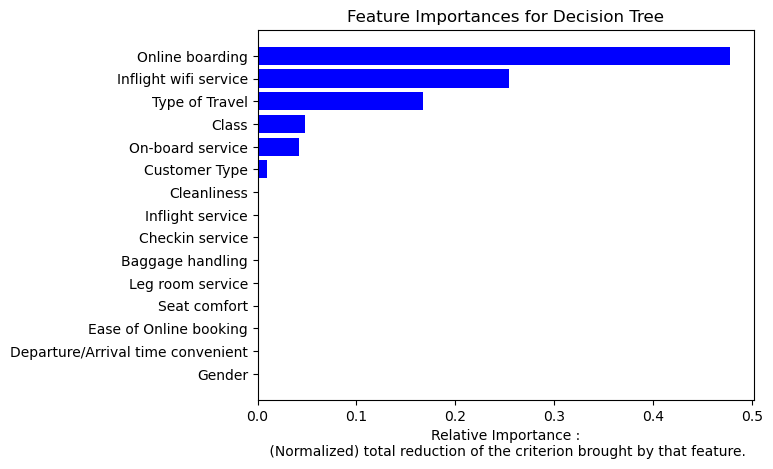

In [112]:
plot_vimp(0, x, y, feature_names)

## Variable Importance plot of Random Forest

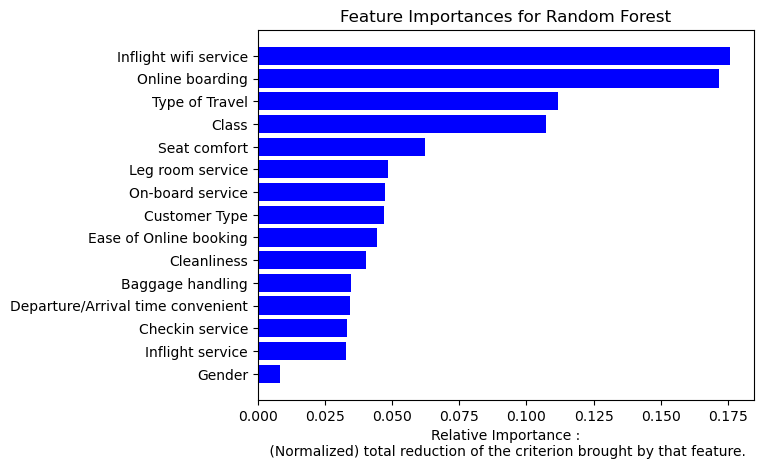

In [113]:
plot_vimp(1, x, y, feature_names)

## Variable Importance plot of Gradient Boost

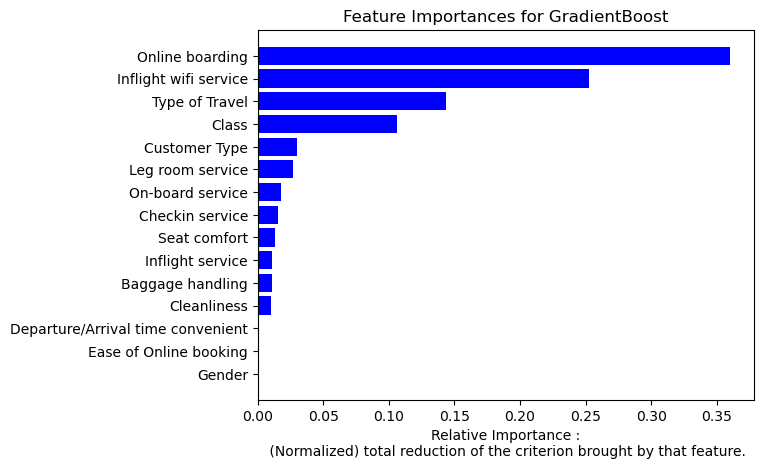

In [114]:
plot_vimp(2, x, y, feature_names)

## Variable Importance plot of AdaBoost 

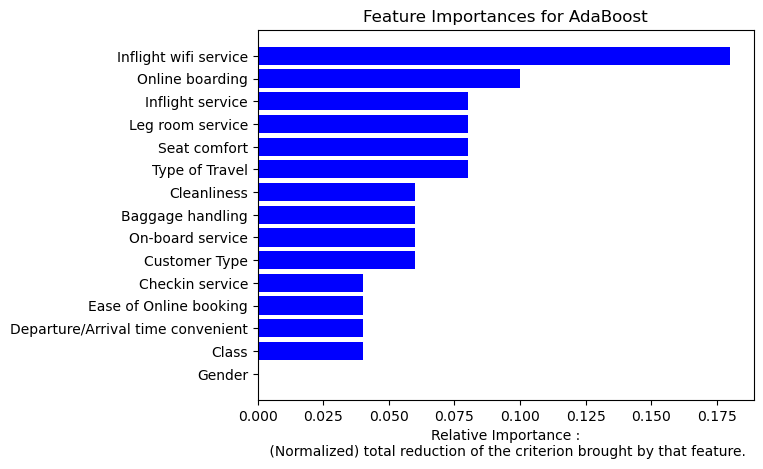

In [115]:
plot_vimp(3, x, y, feature_names)

## Variable Importance plot of XGBoost

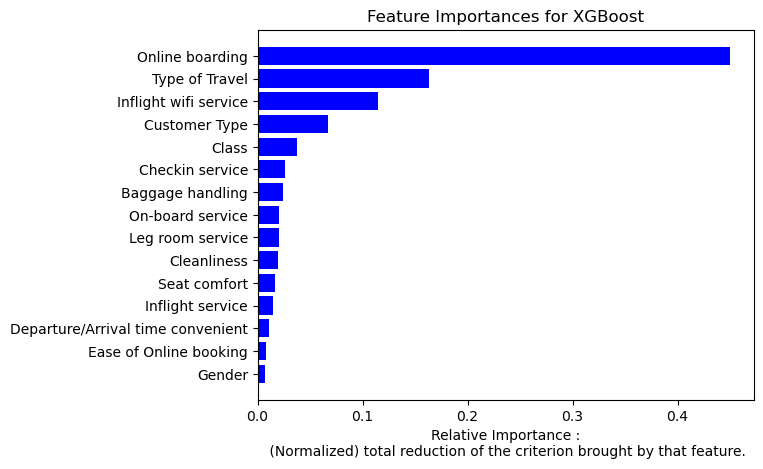

In [116]:
plot_vimp(4, x, y, feature_names)

## Confusion Matrix and ROC curve of Logistic Regression

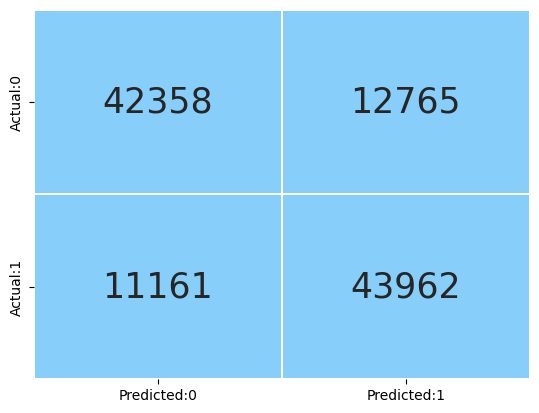

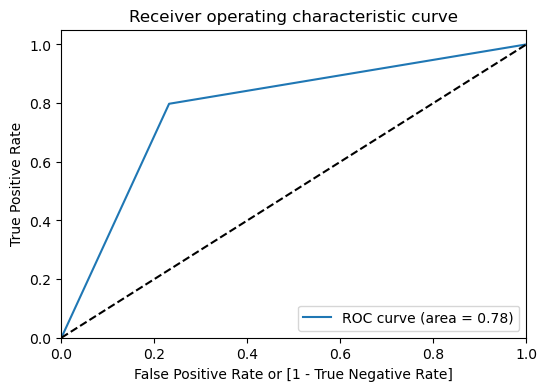

In [117]:
con_lr=confusion_matrix(Y,ypred_sm_lr)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(Y,ypred_sm_lr)

## Confusion Matrix and ROC curve of KNeighbour Classifier

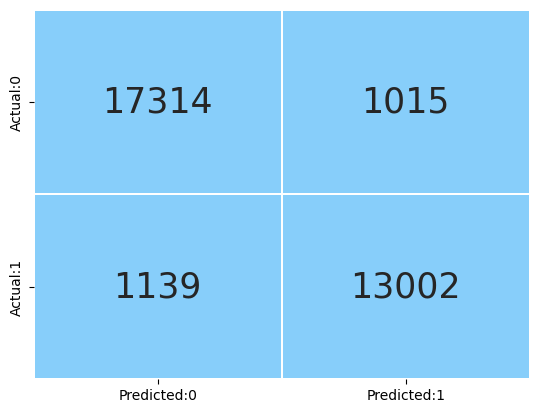

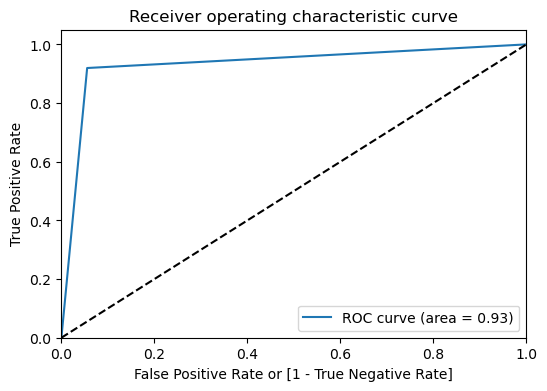

In [118]:
con_lr=confusion_matrix(ytest,ypred_sm_knn)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_knn)

## Confusion Matrix and ROC curve of Gaussian Naive Bayes

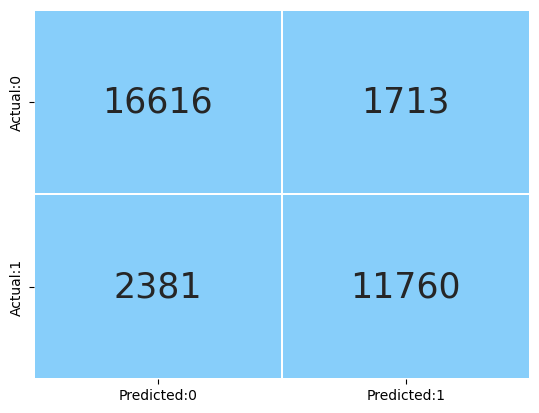

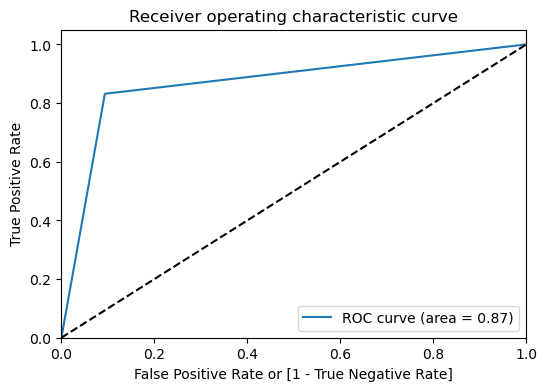

In [119]:
con_lr=confusion_matrix(ytest,ypred_sm_gnb)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_gnb)

## Confusion Matrix and ROC curve of Decision Tree

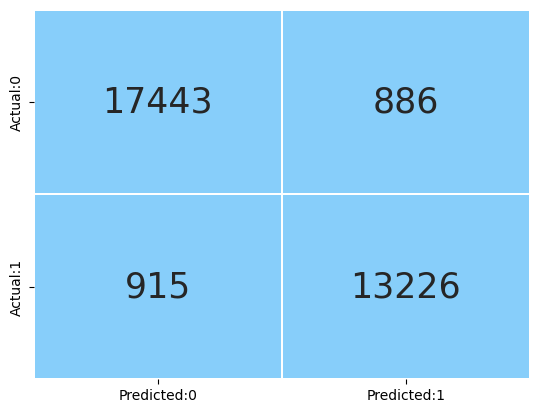

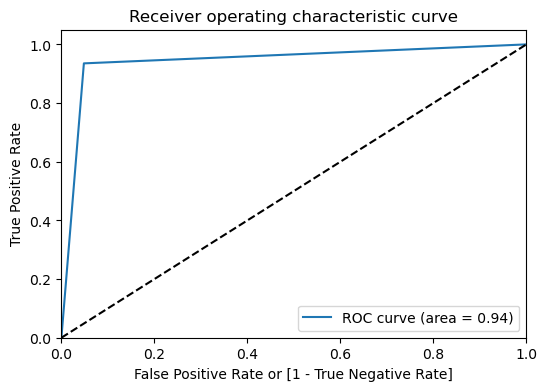

In [120]:
con_lr=confusion_matrix(ytest,ypred_sm_dt)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_dt)

## Confusion Matrix and ROC curve of Random Forest

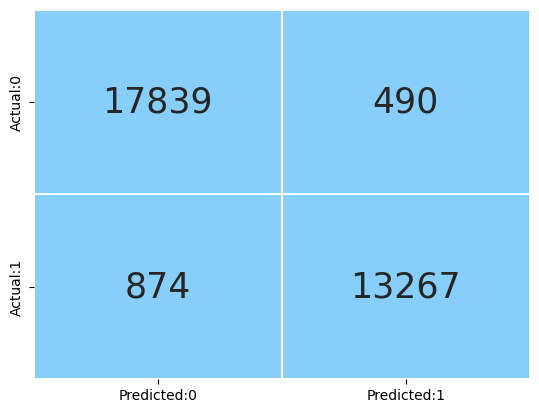

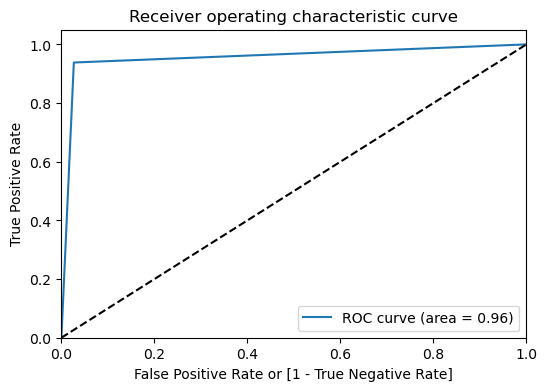

In [121]:
con_lr=confusion_matrix(ytest,ypred_sm_rf)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_rf)

## Confusion Matrix and ROC curve of Gradient Boost 

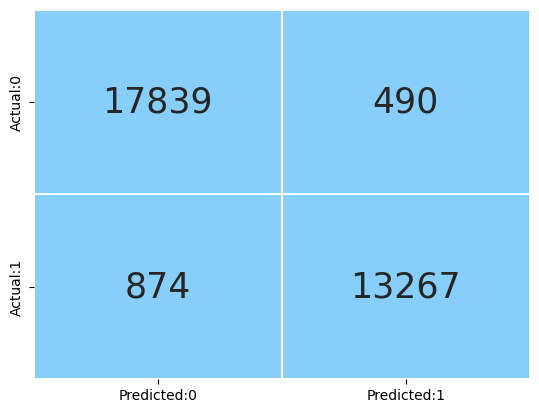

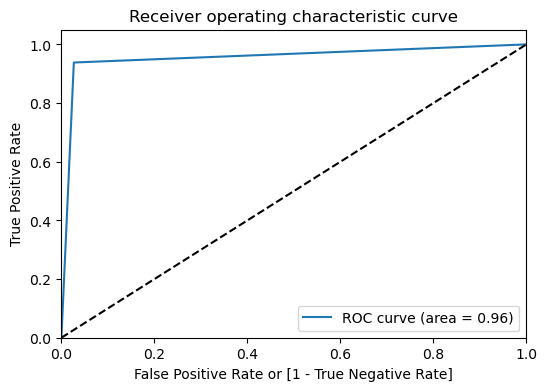

In [122]:
con_lr=confusion_matrix(ytest,ypred_sm_gbc)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_gbc)

## Confusion Matrix and ROC curve of AdaBoost

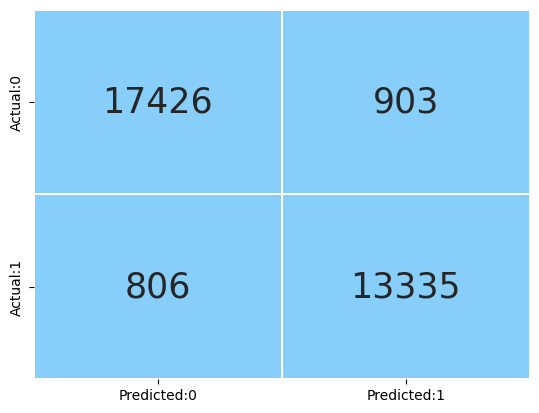

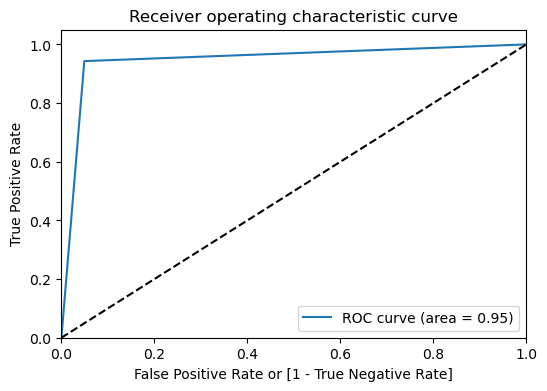

In [123]:
con_lr=confusion_matrix(ytest,ypred_sm_ada)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_ada)

## Confusion Matrix and ROC curve of XGBoost

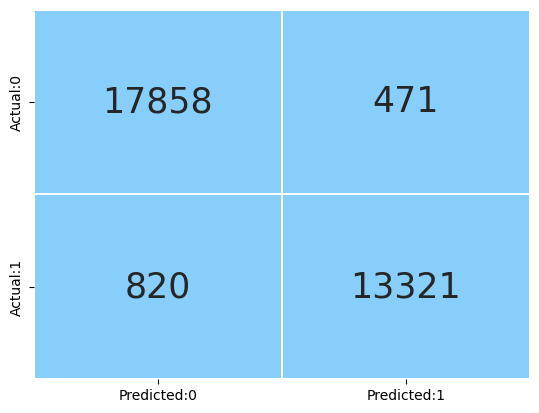

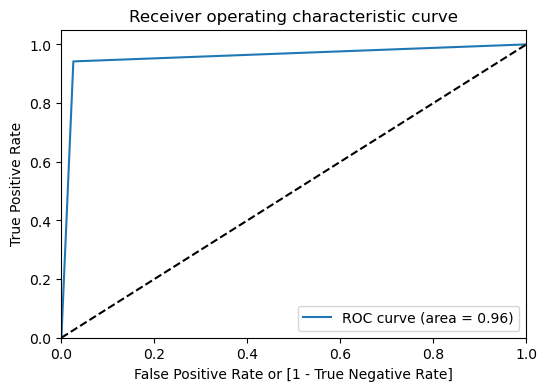

In [124]:
con_lr=confusion_matrix(ytest,ypred_sm_xg)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_sm_xg)

## Tuned Random Forest by changing max_depth

In [54]:
rf=RandomForestClassifier(max_depth=8, min_samples_split=4)
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     18329
         1.0       0.93      0.93      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [55]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[52078  3045]
 [ 3462 51661]]
f1_score:  0.9407533529395696
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     55123
         1.0       0.94      0.94      0.94     55123

    accuracy                           0.94    110246
   macro avg       0.94      0.94      0.94    110246
weighted avg       0.94      0.94      0.94    110246



In [57]:
weighted_f1score = f1_score(ytest,ypred_sm_rf,average='weighted')
weighted_f1score

0.9384968257198598

In [58]:
rf=RandomForestClassifier(max_depth=15, min_samples_split=10)
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     18329
         1.0       0.96      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [59]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[53788  1335]
 [ 2268 52855]]
f1_score:  0.9670396018771784
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [60]:
weighted_f1score = f1_score(ytest,ypred_sm_rf,average='weighted')
weighted_f1score

0.9576386367814617

In [44]:
rf=RandomForestClassifier(max_depth=20, min_samples_split=15)
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [45]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54143   980]
 [ 2125 52998]]
f1_score:  0.9715401325377403
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [63]:
weighted_f1score = f1_score(ytest,ypred_sm_rf,average='weighted')
weighted_f1score

0.9600252840048912

In [46]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_rf,average='weighted')
weighted_f1score

0.9718326745585883

In [28]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
rf=RandomForestClassifier(max_depth=19, min_samples_split=16)
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [65]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54081  1042]
 [ 2190 52933]]
f1_score:  0.9703752589415021
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [66]:
weighted_f1score = f1_score(ytest,ypred_sm_rf,average='weighted')
weighted_f1score

0.9598409751843245

In [67]:
rf=RandomForestClassifier(max_depth=5, min_samples_split=3)
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     18329
         1.0       0.91      0.92      0.91     14141

    accuracy                           0.93     32470
   macro avg       0.92      0.92      0.92     32470
weighted avg       0.93      0.93      0.93     32470



In [68]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[51296  3827]
 [ 4203 50920]]
f1_score:  0.9269136251934104
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93     55123
         1.0       0.93      0.92      0.93     55123

    accuracy                           0.93    110246
   macro avg       0.93      0.93      0.93    110246
weighted avg       0.93      0.93      0.93    110246



In [69]:
weighted_f1score = f1_score(ytest,ypred_sm_rf,average='weighted')
weighted_f1score

0.925422360793182

## Tuning for XGBoost 

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create the XGBoost model
xgb_model = XGBClassifier()

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_macro', cv=cv)
grid_result = grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)


Best Parameters:  {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy:  0.9652640723466002


In [21]:
xg=XGBClassifier(learning_rate=0.01,max_depth= 9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     18329
         1.0       0.95      0.93      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.94      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [22]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[53101  2022]
 [ 3431 51692]]
f1_score:  0.9498975532217904
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     55123
         1.0       0.96      0.94      0.95     55123

    accuracy                           0.95    110246
   macro avg       0.95      0.95      0.95    110246
weighted avg       0.95      0.95      0.95    110246



In [77]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9465914773999816

In [26]:
xg=XGBClassifier(learning_rate=0.05,max_depth=9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     18329
         1.0       0.96      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [27]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[53830  1293]
 [ 2665 52458]]
f1_score:  0.9636460495618789
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     55123
         1.0       0.98      0.95      0.96     55123

    accuracy                           0.96    110246
   macro avg       0.96      0.96      0.96    110246
weighted avg       0.96      0.96      0.96    110246



In [28]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9577399699480551

In [29]:
xg=XGBClassifier(learning_rate=0.1,max_depth=9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [30]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54147   976]
 [ 2270 52853]]
f1_score:  0.9702070636610618
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [43]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9554504823331044

In [31]:
xg=XGBClassifier(learning_rate=0.2,max_depth=5)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [32]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[53855  1268]
 [ 2589 52534]]
f1_score:  0.964590314436539
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     55123
         1.0       0.98      0.95      0.96     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [44]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9554504823331044

In [33]:
xg=XGBClassifier(learning_rate=0.2,max_depth=7)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [34]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54112  1011]
 [ 2220 52903]]
f1_score:  0.97036785678256
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [53]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9611563145587212

In [35]:
xg=XGBClassifier(learning_rate=0.3,max_depth=8)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [36]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54421   702]
 [ 1589 53534]]
f1_score:  0.9790506496950411
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.99      0.97      0.98     55123

    accuracy                           0.98    110246
   macro avg       0.98      0.98      0.98    110246
weighted avg       0.98      0.98      0.98    110246



In [71]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9606720912192898

In [41]:
xg=XGBClassifier(learning_rate=0.2,max_depth=8)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.96     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [42]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54280   843]
 [ 1954 53169]]
f1_score:  0.9743711916433776
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [43]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_xg,average='weighted')
weighted_f1score

0.9746268882415636

In [73]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9613765641912174

In [26]:
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 8,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [39]:
xg=XGBClassifier(learning_rate=0.2,max_depth=9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.96     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [40]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54405   718]
 [ 1680 53443]]
f1_score:  0.978057172138648
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.99      0.97      0.98     55123

    accuracy                           0.98    110246
   macro avg       0.98      0.98      0.98    110246
weighted avg       0.98      0.98      0.98    110246



In [75]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9613436713777487

## Tuning Logistic Regression 

In [93]:
from sklearn.model_selection import GridSearchCV

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
# X should contain features, and y should contain the target variable

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],             # Regularization term
    'C': [0.001,0.01,0.1,1,1,10,100],    # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 500]     # Maximum number of iterations
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X, Y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [94]:
lr=LogisticRegression(C= 0.001 ,max_iter =100, penalty ='l1', solver= 'saga')
lr.fit(X,Y)
ypred_sm_lr=lr.predict(X)
print(classification_report(Y,ypred_sm_lr))

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78     55123
         1.0       0.77      0.82      0.79     55123

    accuracy                           0.79    110246
   macro avg       0.79      0.79      0.79    110246
weighted avg       0.79      0.79      0.79    110246



In [95]:
weighted_f1score = f1_score(Y,ypred_sm_lr,average='weighted')
weighted_f1score

0.7893226202264733

In [96]:
predicted_xtrain_lr=lr.predict(X)
print('\nTraining data')
matrix=confusion_matrix(Y,predicted_xtrain_lr)
print(matrix)
measure_train=classification_report(Y,predicted_xtrain_lr)
print('f1_score: ',metrics.f1_score(y,predicted_xtrain_lr))
print(measure_train)


Training data
[[42056 13067]
 [10143 44980]]
f1_score:  0.7949103119201202
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78     55123
         1.0       0.77      0.82      0.79     55123

    accuracy                           0.79    110246
   macro avg       0.79      0.79      0.79    110246
weighted avg       0.79      0.79      0.79    110246



In [97]:
weighted_f1score = f1_score(Y,predicted_xtrain_lr,average='weighted')
weighted_f1score

0.7893226202264733

## Tuning Kneighbour Classifier 

In [61]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9,311,313],          
    'weights': ['uniform', 'distance'],   
    'p': [1, 2]                          
}

grid_search = GridSearchCV( knn, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [62]:
knn=KNeighborsClassifier(n_neighbors= 5, p = 1, weights= 'distance')
knn.fit(xtrain,ytrain)
ypred_sm_knn=knn.predict(xtest)
print(classification_report(ytest,ypred_sm_knn))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     18329
         1.0       0.94      0.91      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [63]:
weighted_f1score = f1_score(ytest,ypred_sm_knn,average='weighted')
weighted_f1score

0.9379574015387457

In [64]:
predicted_xtrain_knn=knn.predict(xtrain)
confusion_matrix(ytrain,predicted_xtrain_knn)
measure_train=classification_report(ytrain,predicted_xtrain_knn)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_knn))
print(measure_train)

f1_score:  0.9971721359920711
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     55123

    accuracy                           1.00    110246
   macro avg       1.00      1.00      1.00    110246
weighted avg       1.00      1.00      1.00    110246



In [65]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_knn,average='weighted')
weighted_f1score

0.9971790191791329

## Tuning Gaussian Naive Bayes 

In [102]:


# Define the hyperparameter grid to search
param_grid = {
    'priors': [None, [0.3, 0.7], [0.5, 0.5]],  # Vary the priors
    'var_smoothing': [1e-10, 1e-9, 1e-8]         # Vary the var_smoothing
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-10}


In [103]:
gnb=GaussianNB(priors= None, var_smoothing= 1e-10)
gnb.fit(xtrain,ytrain)
ypred_sm_gnb=gnb.predict(xtest)
print(classification_report(ytest,ypred_sm_gnb))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [104]:
weighted_f1score = f1_score(ytest,ypred_sm_gnb,average='weighted')
weighted_f1score

0.8735175749649855

In [105]:
predicted_xtrain_gnb=gnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)


Training data
[[49927  5196]
 [ 9054 46069]]
f1_score:  0.866056322141595
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     55123
         1.0       0.90      0.84      0.87     55123

    accuracy                           0.87    110246
   macro avg       0.87      0.87      0.87    110246
weighted avg       0.87      0.87      0.87    110246



In [106]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_gnb,average='weighted')
weighted_f1score

0.8705851266460621

## Tuning Decision Tree 

In [107]:


# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],                  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum number of samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2', 0.5]     # Number of features to consider for the best split
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [109]:
dt=DecisionTreeClassifier(max_depth= 15, max_features= None, min_samples_leaf= 1, min_samples_split= 5)
dt.fit(xtrain,ytrain)
ypred_sm_dt=dt.predict(xtest)
print(classification_report(ytest,ypred_sm_dt))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [110]:
weighted_f1score = f1_score(ytest,ypred_sm_dt,average='weighted')
weighted_f1score

0.9520598022564845

In [111]:
predicted_xtrain_dt=dt.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)


Training data
[[53760  1363]
 [ 2372 52751]]
f1_score:  0.9658082884004504
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [112]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_dt,average='weighted')
weighted_f1score

0.966118381762582

## Tuning Random Forest 

In [32]:

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],                   # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],                    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                     # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', 0.5]     # Number of features to consider for the best split
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [33]:
rf=RandomForestClassifier(max_depth= None, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 200)
rf_sm_model=rf.fit(xtrain,ytrain)
ypred_sm_rf=rf_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [34]:
weighted_f1score = f1_score(ytest,ypred_sm_rf,average='weighted')
weighted_f1score

0.9603541415472254

In [35]:
predicted_xtrain_rf=rf_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54521   602]
 [ 1479 53644]]
f1_score:  0.9809726705007817
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.99      0.97      0.98     55123

    accuracy                           0.98    110246
   macro avg       0.98      0.98      0.98    110246
weighted avg       0.98      0.98      0.98    110246



In [36]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_rf,average='weighted')
weighted_f1score

0.9811228371446882

## Tuning Ada boost classifier 

In [37]:


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of weak learners (trees)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Weight applied to each weak learner
    'algorithm': ['SAMME', 'SAMME.R']        # The algorithm to use for the weak learners
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

  


Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}


In [38]:
ada=AdaBoostClassifier(dt,algorithm = 'SAMME', learning_rate =  0.5, n_estimators =  200,random_state=10)
ada_sm_model=ada.fit(xtrain,ytrain)
ypred_sm_ada=ada.predict(xtest)
print(classification_report(ytest,ypred_sm_ada))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.95     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [39]:
weighted_f1score = f1_score(ytest,ypred_sm_ada,average='weighted')
weighted_f1score

0.9531747266348217

In [40]:
predicted_xtrain_ada=ada_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)


Training data
[[55102    21]
 [  290 54833]]
f1_score:  0.9971721359920711
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     55123

    accuracy                           1.00    110246
   macro avg       1.00      1.00      1.00    110246
weighted avg       1.00      1.00      1.00    110246



In [41]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_ada,average='weighted')
weighted_f1score

0.9971790191791329

## Tuned Gradient boost 

In [52]:


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5],        # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],                   # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV( gbc, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [53]:
gbc=GradientBoostingClassifier(learning_rate= 0.5, max_depth= 4, min_samples_leaf= 2, min_samples_split= 10,n_estimators= 200 )
gbc_sm_model=gbc.fit(xtrain,ytrain)
ypred_sm_gbc=gbc.predict(xtest)
print(classification_report(ytest,ypred_sm_gbc))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     18329
         1.0       0.96      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [54]:
weighted_f1score = f1_score(ytest,ypred_sm_gbc,average='weighted')
weighted_f1score

0.9591313677105608

In [55]:
predicted_xtrain_gbc=gbc_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gbc)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gbc)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gbc))
print(measure_train)


Training data
[[54076  1047]
 [ 2169 52954]]
f1_score:  0.9705289395550017
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [56]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_gbc,average='weighted')
weighted_f1score

0.9708258518621212

## Tuning XG Boost 

In [47]:

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [None,0.01, 0.1, 0.2],        # Step size shrinkage used to prevent overfitting
    'n_estimators': [None,50, 100, 200],             # Number of boosting rounds (trees)
    'max_depth': [None,3, 4, 5],                     # Maximum depth of the trees
    'subsample': [None,0.8, 1.0],                    # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': [None,0.8, 1.0],             # Fraction of features used for fitting the individual base learners
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(xg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 200, 'subsample': None}


In [48]:
xg=XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.2, max_depth= None, n_estimators= 200, subsample= None)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [49]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9609446727364868

In [50]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54211   912]
 [ 2107 53016]]
f1_score:  0.9723157054955938
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.96      0.97     55123

    accuracy                           0.97    110246
   macro avg       0.97      0.97      0.97    110246
weighted avg       0.97      0.97      0.97    110246



In [51]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_xg,average='weighted')
weighted_f1score

0.9726125686961462